In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Libraries setup
os.chdir('../dados/')
print(os.getcwd())
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/home/shin/Downloads/dados


In [11]:
#Importing datasets
train = pd.read_csv('application_train.csv')
#test = pd.read_csv('application_test.csv')
#b1 = pd.read_csv('bureau.csv')
#bb2 = pd.read_csv('bureau_balance.csv')
#pa1 = pd.read_csv('previous_application.csv')
#pos2 = pd.read_csv('POS_CASH_balance.csv')
#ip2 = pd.read_csv('installments_payments.csv')
#cb2 = pd.read_csv('credit_card_balance.csv')
description = pd.read_csv("HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
#sample = pd.read_csv('sample_submission.csv')

In [12]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
#dataset_setup
train.columns = map(str.lower, train.columns)
description.columns = map(str.lower, description.columns)
train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Exploration

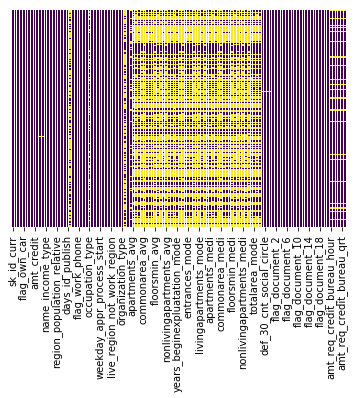

In [14]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
0


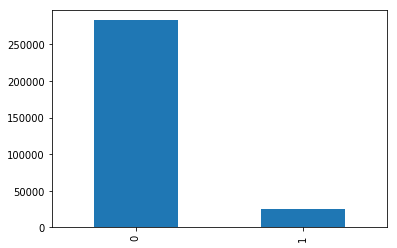

In [15]:
#target
print(description['description'][1])
train.target.value_counts().plot(kind='bar')
print(train.target.isnull().sum())

In [16]:
#name_contract_type (crédito rotativo é o crédito em caso de falta de dinheiro, têm juros mais altos)
print(description['description'][2])
print(train.name_contract_type.isnull().sum())
train.target.groupby(train.name_contract_type).describe()

Identification if loan is cash or revolving
0


,count,mean,std,min,25%,50%,75%,max
name_contract_type,,,,,,,,
Cash loans,278232.0,0.083459,0.276575,0.0,0.0,0.0,0.0,1.0
Revolving loans,29279.0,0.054783,0.227561,0.0,0.0,0.0,0.0,1.0


In [17]:
# Gender M,F or XNA
print(description['description'][3])
print(train.code_gender.isnull().sum())
train.target.groupby(train.code_gender).describe()

Gender of the client
0


,count,mean,std,min,25%,50%,75%,max
code_gender,,,,,,,,
F,202448.0,0.069993,0.255136,0.0,0.0,0.0,0.0,1.0
M,105059.0,0.101419,0.301884,0.0,0.0,0.0,0.0,1.0
XNA,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
#Flag own car: tem carro ou nao
print(description['description'][4])
print(train.flag_own_car.isnull().sum())
train.target.groupby(train.flag_own_car).describe()

Flag if the client owns a car
0


,count,mean,std,min,25%,50%,75%,max
flag_own_car,,,,,,,,
N,202924.0,0.085002,0.278886,0.0,0.0,0.0,0.0,1.0
Y,104587.0,0.072437,0.259212,0.0,0.0,0.0,0.0,1.0


In [19]:
#Flag own realty: tem casa ou nao
print(description['description'][5])
print(train.flag_own_realty.isnull().sum())
train.target.groupby(train.flag_own_realty).describe()

Flag if client owns a house or flat
0


,count,mean,std,min,25%,50%,75%,max
flag_own_realty,,,,,,,,
N,94199.0,0.083249,0.276260,0.0,0.0,0.0,0.0,1.0
Y,213312.0,0.079616,0.270698,0.0,0.0,0.0,0.0,1.0


In [20]:
#cnt_children - transformar em binario
print(description['description'][6])
print(train.cnt_children.isnull().sum())
train.target.groupby(train.cnt_children).describe()

Number of children the client has
0


,count,mean,std,min,25%,50%,75%,max
cnt_children,,,,,,,,
0,215371.0,0.077118,0.266779,0.0,0.0,0.0,0.0,1.0
1,61119.0,0.089236,0.285086,0.0,0.0,0.0,0.0,1.0
2,26749.0,0.087218,0.282160,0.0,0.0,0.0,0.0,1.0
3,3717.0,0.096314,0.295061,0.0,0.0,0.0,0.0,1.0
4,429.0,0.128205,0.334708,0.0,0.0,0.0,0.0,1.0
5,84.0,0.083333,0.278045,0.0,0.0,0.0,0.0,1.0
6,21.0,0.285714,0.462910,0.0,0.0,0.0,1.0,1.0
7,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Income of the client
0


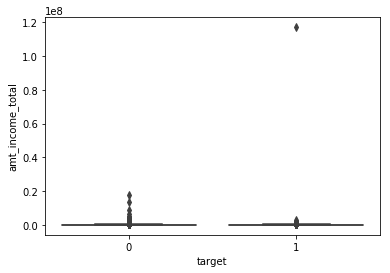

In [21]:
#amt_income_total - quanto o cliente ganha
print(description['description'][7])
print(train.amt_income_total.isnull().sum())
sns.boxplot(x='target', y='amt_income_total', data=train)

Credit amount of the loan
0


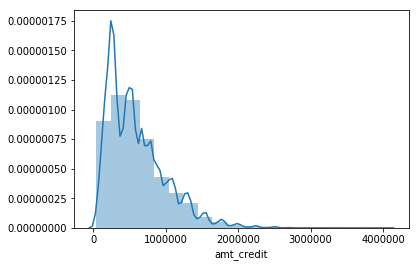

In [22]:
#amt_credit - valor do emprestimo
print(description['description'][8])
print(train.amt_credit.isnull().sum())
sns.distplot(train.amt_credit, kde=True, bins=20)

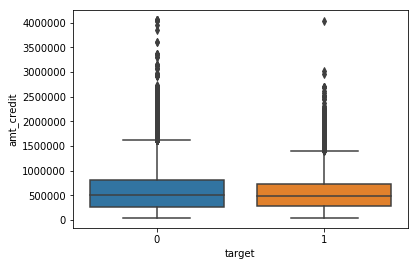

In [23]:
sns.boxplot(x='target', y='amt_credit', data=train)

In [24]:
#amt_annuity
print(description['description'][9])
print(train.amt_annuity.isnull().sum())
train.amt_annuity.describe()

Loan annuity
12


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: amt_annuity, dtype: float64

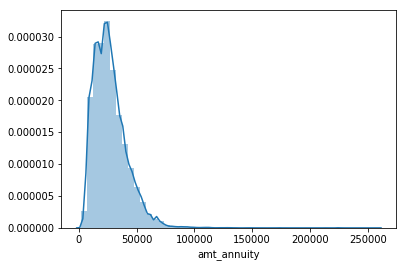

In [25]:
sns.distplot(train.amt_annuity.dropna(), kde=True)

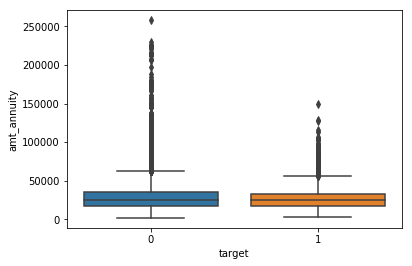

In [26]:
sns.boxplot(x='target', y='amt_annuity', data=train)

For consumer loans it is the price of the goods for which the loan is given
278


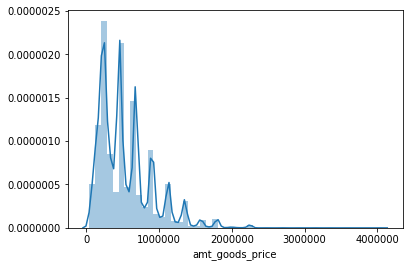

In [27]:
#amt_goods_price - preço dos bens para o qual vai ser feito o empréstimo
print(description['description'][10])
print(train.amt_goods_price.isnull().sum())
sns.distplot(train.amt_goods_price.dropna(), kde=True)

In [28]:
#name_type_suite - pessoa que estava acompanhando o cliente na hora de pedir o emprésdescription['description']timo
print(description['description'][11])
print(train.name_type_suite.isnull().sum())
train.target.groupby(train.name_type_suite).describe()

Who was accompanying client when he was applying for the loan
1292


,count,mean,std,min,25%,50%,75%,max
name_type_suite,,,,,,,,
Children,3267.0,0.073768,0.261433,0.0,0.0,0.0,0.0,1.0
Family,40149.0,0.074946,0.263307,0.0,0.0,0.0,0.0,1.0
Group of people,271.0,0.084871,0.279205,0.0,0.0,0.0,0.0,1.0
Other_A,866.0,0.087760,0.283109,0.0,0.0,0.0,0.0,1.0
Other_B,1770.0,0.098305,0.297811,0.0,0.0,0.0,0.0,1.0
"Spouse, partner",11370.0,0.078716,0.269307,0.0,0.0,0.0,0.0,1.0
Unaccompanied,248526.0,0.081830,0.274107,0.0,0.0,0.0,0.0,1.0


In [29]:
#name_income_type - de onde vem a grana
print(description['description'][12])
print(train.name_income_type.isnull().sum())
train.target.groupby(train.name_income_type).describe()

Clients income type (businessman, working, maternity leave,)
0


,count,mean,std,min,25%,50%,75%,max
name_income_type,,,,,,,,
Businessman,10.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Commercial associate,71617.0,0.074843,0.263139,0.0,0.0,0.0,0.0,1.0
Maternity leave,5.0,0.400000,0.547723,0.0,0.0,0.0,1.0,1.0
Pensioner,55362.0,0.053864,0.225750,0.0,0.0,0.0,0.0,1.0
State servant,21703.0,0.057550,0.232895,0.0,0.0,0.0,0.0,1.0
Student,18.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Unemployed,22.0,0.363636,0.492366,0.0,0.0,0.0,1.0,1.0
Working,158774.0,0.095885,0.294434,0.0,0.0,0.0,0.0,1.0


In [30]:
#name_education_type - grau de escolaridade
print(description['description'][13])
print(train.name_education_type.isnull().sum())
train.target.groupby(train.name_education_type).describe()

Level of highest education the client achieved
0


,count,mean,std,min,25%,50%,75%,max
name_education_type,,,,,,,,
Academic degree,164.0,0.018293,0.134418,0.0,0.0,0.0,0.0,1.0
Higher education,74863.0,0.053551,0.225131,0.0,0.0,0.0,0.0,1.0
Incomplete higher,10277.0,0.084850,0.278671,0.0,0.0,0.0,0.0,1.0
Lower secondary,3816.0,0.109277,0.312027,0.0,0.0,0.0,0.0,1.0
Secondary / secondary special,218391.0,0.089399,0.285320,0.0,0.0,0.0,0.0,1.0


In [31]:
#name_family_status - estado civil
print(description['description'][14])
print(train.name_family_status.isnull().sum())
train.target.groupby(train.name_family_status).describe()

Family status of the client
0


,count,mean,std,min,25%,50%,75%,max
name_family_status,,,,,,,,
Civil marriage,29775.0,0.099446,0.299265,0.0,0.0,0.0,0.0,1.0
Married,196432.0,0.075599,0.264356,0.0,0.0,0.0,0.0,1.0
Separated,19770.0,0.081942,0.274284,0.0,0.0,0.0,0.0,1.0
Single / not married,45444.0,0.098077,0.297422,0.0,0.0,0.0,0.0,1.0
Unknown,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Widow,16088.0,0.058242,0.234208,0.0,0.0,0.0,0.0,1.0


In [32]:
#name_housing_type - mora com quem
print(description['description'][15])
print(train.name_housing_type.isnull().sum())
train.target.groupby(train.name_housing_type).describe()

What is the housing situation of the client (renting, living with parents, ...)
0


,count,mean,std,min,25%,50%,75%,max
name_housing_type,,,,,,,,
Co-op apartment,1122.0,0.079323,0.270362,0.0,0.0,0.0,0.0,1.0
House / apartment,272868.0,0.077957,0.268105,0.0,0.0,0.0,0.0,1.0
Municipal apartment,11183.0,0.085397,0.279485,0.0,0.0,0.0,0.0,1.0
Office apartment,2617.0,0.065724,0.247847,0.0,0.0,0.0,0.0,1.0
Rented apartment,4881.0,0.123131,0.328621,0.0,0.0,0.0,0.0,1.0
With parents,14840.0,0.116981,0.321409,0.0,0.0,0.0,0.0,1.0


Normalized population of region where client lives (higher number means the client lives in more populated region)
0


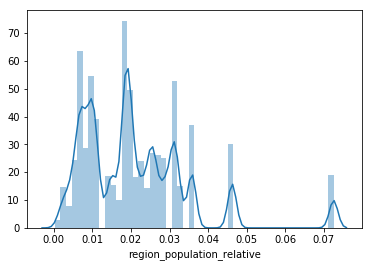

In [33]:
#region_population_relative - populacao de onde a pessoa mora
print(description['description'][16])
print(train.region_population_relative.isnull().sum())
sns.distplot(train.region_population_relative, kde=True)

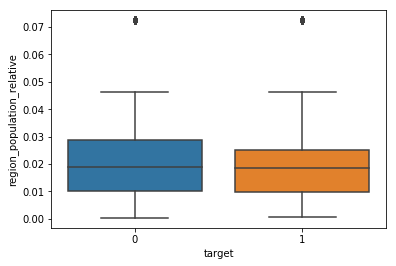

In [34]:
sns.boxplot(x='target', y='region_population_relative', data=train)

Client's age in days at the time of application
0


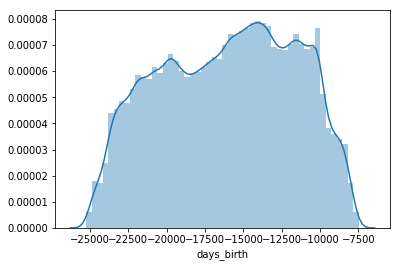

In [35]:
#days_birth
print(description['description'][17])
print(train.days_birth.isnull().sum())
sns.distplot(train.days_birth, kde=True)

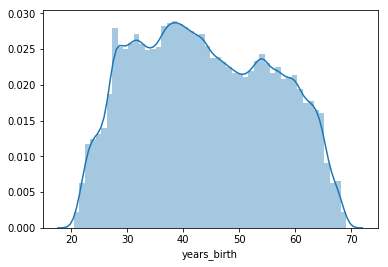

In [36]:
#years_birth - idade nova feature
train['years_birth'] = train['days_birth']/365*(-1)
sns.distplot(train.years_birth, kde=True)

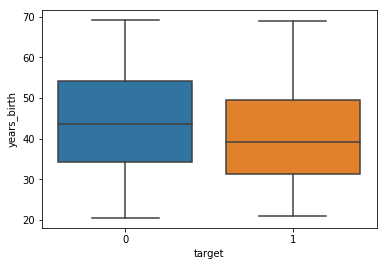

In [37]:
sns.boxplot(x='target', y='years_birth', data=train)

How many days before the application the person started current employment
0


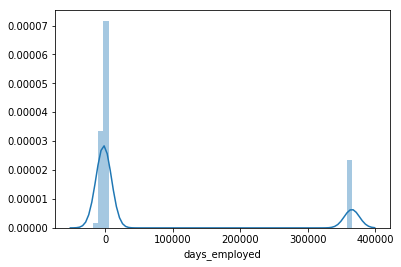

In [38]:
#days_employed - ha quantos dias a pessoa trabalha no emprego atual
print(description['description'][18])
print(train.days_employed.isnull().sum())
sns.distplot(train.days_employed, kde=True)

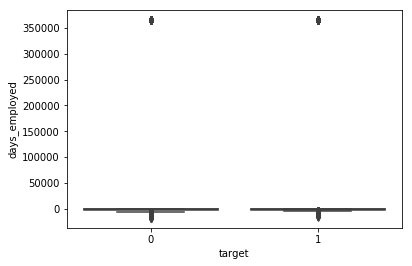

In [39]:
sns.boxplot(x='target', y='days_employed', data=train)

How many days before the application did client change his registration
0


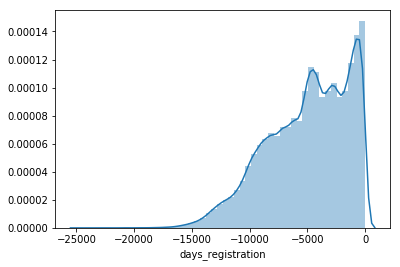

In [40]:
#days_registration - quantos dias antes do emprestimo o cliente mudou o seu registro... do que??
print(description['description'][19])
print(train.days_registration.isnull().sum())
sns.distplot(train.days_registration, kde=True)

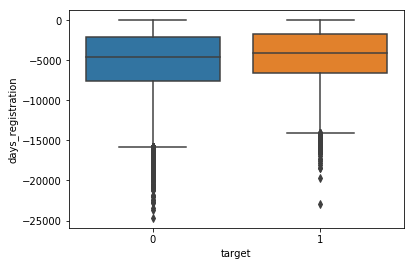

In [41]:
sns.boxplot(x='target', y='days_registration', data=train)

How many days before the application did client change the identity document with which he applied for the loan
0


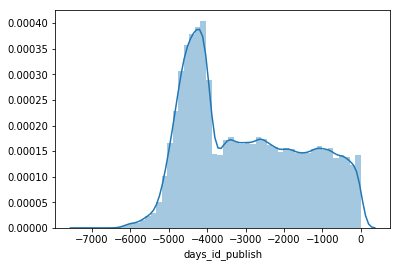

In [42]:
#days_id_publish - qntos dias antes o cliente mudou de documento de identidade
print(description['description'][20])
print(train.days_id_publish.isnull().sum())
sns.distplot(train.days_id_publish, kde=True)

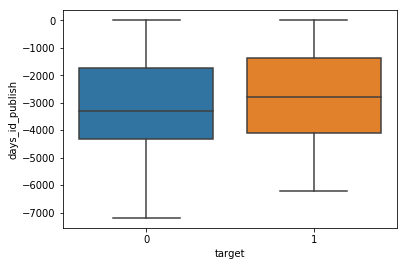

In [43]:
sns.boxplot(x='target', y='days_id_publish', data=train)

Age of client's car
202929


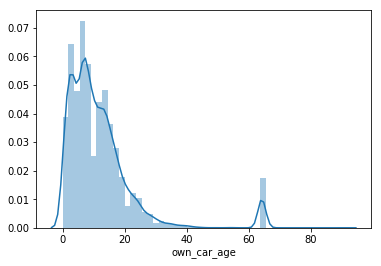

In [44]:
#own_car_age - idade do carro - transformar em categorico
print(description['description'][21])
print(train.own_car_age.isnull().sum())
train.own_car_age.describe()
sns.distplot(train.own_car_age.dropna(), kde=True)

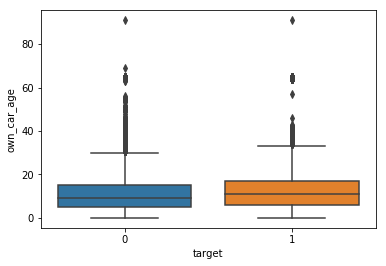

In [45]:
sns.boxplot(x='target', y='own_car_age', data=train)

In [46]:
#flag_mobil - possui celular ou nao
print(description['description'][22])
print(train.flag_mobil.isnull().sum())
train.target.groupby(train.flag_mobil).describe()

Did client provide mobile phone (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_mobil,,,,,,,,
0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1,307510.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0


In [47]:
#flag_emp_phone - se o cliente deu o telefone de casa
print(description['description'][24])
print(train.flag_emp_phone.isnull().sum())
train.target.groupby(train.flag_emp_phone).describe()

Did client provide home phone (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_emp_phone,,,,,,,,
0,55386.0,0.054003,0.226025,0.0,0.0,0.0,0.0,1.0
1,252125.0,0.086600,0.281248,0.0,0.0,0.0,0.0,1.0


In [48]:
#flag_work_phone - se o cliente due o telefone de trabalho
print(description['description'][23])
print(train.flag_work_phone.isnull().sum())
train.target.groupby(train.flag_work_phone).describe()

Did client provide work phone (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_work_phone,,,,,,,,
0,246203.0,0.076851,0.266356,0.0,0.0,0.0,0.0,1.0
1,61308.0,0.096301,0.295006,0.0,0.0,0.0,0.0,1.0


In [49]:
#flag_cont_mobile - se o telefone era alcancavel
print(description['description'][25])
print(train.flag_cont_mobile.isnull().sum())
train.target.groupby(train.flag_cont_mobile).describe()

Was mobile phone reachable (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_cont_mobile,,,,,,,,
0,574.0,0.078397,0.269030,0.0,0.0,0.0,0.0,1.0
1,306937.0,0.080733,0.272425,0.0,0.0,0.0,0.0,1.0


In [50]:
#flag_phone - se o cliente deu o tel de casa
print(description['description'][26])
print(train.flag_phone.isnull().sum())
train.target.groupby(train.flag_phone).describe()

Did client provide home phone (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_phone,,,,,,,,
0,221080.0,0.084784,0.278560,0.0,0.0,0.0,0.0,1.0
1,86431.0,0.070357,0.255749,0.0,0.0,0.0,0.0,1.0


In [51]:
#flag_email - se o cliente deu um email
print(description['description'][27])
print(train.flag_email.isnull().sum())
train.target.groupby(train.flag_email).describe()

Did client provide email (1=YES, 0=NO)
0


,count,mean,std,min,25%,50%,75%,max
flag_email,,,,,,,,
0,290069.0,0.080846,0.272599,0.0,0.0,0.0,0.0,1.0
1,17442.0,0.078775,0.269396,0.0,0.0,0.0,0.0,1.0


In [52]:
#occupation_type - trabalho cargo
print(description['description'][28])
print(train.occupation_type.isnull().sum())
train.target.groupby(train.occupation_type).describe()

What kind of occupation does the client have
96391


,count,mean,std,min,25%,50%,75%,max
occupation_type,,,,,,,,
Accountants,9813.0,0.048303,0.214417,0.0,0.0,0.0,0.0,1.0
Cleaning staff,4653.0,0.096067,0.294715,0.0,0.0,0.0,0.0,1.0
Cooking staff,5946.0,0.104440,0.305856,0.0,0.0,0.0,0.0,1.0
Core staff,27570.0,0.063040,0.243038,0.0,0.0,0.0,0.0,1.0
Drivers,18603.0,0.113261,0.316920,0.0,0.0,0.0,0.0,1.0
HR staff,563.0,0.063943,0.244869,0.0,0.0,0.0,0.0,1.0
High skill tech staff,11380.0,0.061599,0.240437,0.0,0.0,0.0,0.0,1.0
IT staff,526.0,0.064639,0.246121,0.0,0.0,0.0,0.0,1.0
Laborers,55186.0,0.105788,0.307568,0.0,0.0,0.0,0.0,1.0


In [53]:
#cnt_fam_members - quantos membros de familia
print(description['description'][29])
print(train.cnt_fam_members.isnull().sum())
train.target.groupby(train.cnt_fam_members).describe()

How many family members does client have
2


,count,mean,std,min,25%,50%,75%,max
cnt_fam_members,,,,,,,,
1.0,67847.0,0.083644,0.276855,0.0,0.0,0.0,0.0,1.0
2.0,158357.0,0.075835,0.264735,0.0,0.0,0.0,0.0,1.0
3.0,52601.0,0.087603,0.282719,0.0,0.0,0.0,0.0,1.0
4.0,24697.0,0.086488,0.281089,0.0,0.0,0.0,0.0,1.0
5.0,3478.0,0.094020,0.291898,0.0,0.0,0.0,0.0,1.0
6.0,408.0,0.134804,0.341933,0.0,0.0,0.0,0.0,1.0
7.0,81.0,0.074074,0.263523,0.0,0.0,0.0,0.0,1.0
8.0,20.0,0.300000,0.470162,0.0,0.0,0.0,1.0,1.0
9.0,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
#region_rating_client - rating da empresa
print(description['description'][30])
print(train.region_rating_client.isnull().sum())
train.target.groupby(train.region_rating_client).describe()

Our rating of the region where client lives (1,2,3)
0


,count,mean,std,min,25%,50%,75%,max
region_rating_client,,,,,,,,
1,32197.0,0.048203,0.214199,0.0,0.0,0.0,0.0,1.0
2,226984.0,0.078891,0.269569,0.0,0.0,0.0,0.0,1.0
3,48330.0,0.111028,0.314170,0.0,0.0,0.0,0.0,1.0


In [55]:
#region_rating_client_w_city - rating da empresa da cidade
print(description['description'][31])
print(train.region_rating_client_w_city.isnull().sum())
train.target.groupby(train.region_rating_client_w_city).describe()

Our rating of the region where client lives with taking city into account (1,2,3)
0


,count,mean,std,min,25%,50%,75%,max
region_rating_client_w_city,,,,,,,,
1,34167.0,0.048409,0.214633,0.0,0.0,0.0,0.0,1.0
2,229484.0,0.079178,0.270016,0.0,0.0,0.0,0.0,1.0
3,43860.0,0.114022,0.317841,0.0,0.0,0.0,0.0,1.0


In [56]:
#weekday_appr_process_start - dia da semana
print(description['description'][32])
print(train.weekday_appr_process_start.isnull().sum())
train.target.groupby(train.weekday_appr_process_start).describe()

On which day of the week did the client apply for the loan
0


,count,mean,std,min,25%,50%,75%,max
weekday_appr_process_start,,,,,,,,
FRIDAY,50338.0,0.081469,0.273557,0.0,0.0,0.0,0.0,1.0
MONDAY,50714.0,0.077572,0.267500,0.0,0.0,0.0,0.0,1.0
SATURDAY,33852.0,0.078873,0.269544,0.0,0.0,0.0,0.0,1.0
SUNDAY,16181.0,0.079291,0.270200,0.0,0.0,0.0,0.0,1.0
THURSDAY,50591.0,0.081003,0.272842,0.0,0.0,0.0,0.0,1.0
TUESDAY,53901.0,0.083505,0.276647,0.0,0.0,0.0,0.0,1.0
WEDNESDAY,51934.0,0.081604,0.273762,0.0,0.0,0.0,0.0,1.0


In [57]:
#hour_appr_process_start - hora
print(description['description'][33])
print(train.hour_appr_process_start.isnull().sum())
train.target.groupby(train.hour_appr_process_start).describe()

Approximately at what hour did the client apply for the loan
0


,count,mean,std,min,25%,50%,75%,max
hour_appr_process_start,,,,,,,,
0,40.0,0.150000,0.361620,0.0,0.0,0.0,0.0,1.0
1,86.0,0.081395,0.275045,0.0,0.0,0.0,0.0,1.0
2,305.0,0.098361,0.298291,0.0,0.0,0.0,0.0,1.0
3,1230.0,0.086992,0.281938,0.0,0.0,0.0,0.0,1.0
4,2090.0,0.082775,0.275608,0.0,0.0,0.0,0.0,1.0
5,3638.0,0.105827,0.307659,0.0,0.0,0.0,0.0,1.0
6,5842.0,0.110407,0.313424,0.0,0.0,0.0,0.0,1.0
7,9131.0,0.100427,0.300585,0.0,0.0,0.0,0.0,1.0
8,15127.0,0.090765,0.287284,0.0,0.0,0.0,0.0,1.0


In [58]:
#reg_region_not_live_region - se o endereco dado bate com o endereco real
print(description['description'][34])
print(train.reg_region_not_live_region.isnull().sum())
train.target.groupby(train.reg_region_not_live_region).describe()

Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
0


,count,mean,std,min,25%,50%,75%,max
reg_region_not_live_region,,,,,,,,
0,302854.0,0.080540,0.272129,0.0,0.0,0.0,0.0,1.0
1,4657.0,0.092978,0.290433,0.0,0.0,0.0,0.0,1.0


In [59]:
#reg_region_not_work_region - se o endereco de trabalho bate com o endereco real
print(description['description'][35])
print(train.reg_region_not_work_region.isnull().sum())
train.target.groupby(train.reg_region_not_work_region).describe()

Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
0


,count,mean,std,min,25%,50%,75%,max
reg_region_not_work_region,,,,,,,,
0,291899.0,0.080291,0.271744,0.0,0.0,0.0,0.0,1.0
1,15612.0,0.088906,0.284617,0.0,0.0,0.0,0.0,1.0


In [60]:
#live_region_not_work_region - se o description['description']endereco de contato nao bate com o endereco de trabalho
print(description['description'][36])
print(train.live_region_not_work_region.isnull().sum())
train.target.groupby(train.live_region_not_work_region).describe()

Flag if client's contact address does not match work address (1=different, 0=same, at region level)
0


,count,mean,std,min,25%,50%,75%,max
live_region_not_work_region,,,,,,,,
0,295008.0,0.080571,0.272175,0.0,0.0,0.0,0.0,1.0
1,12503.0,0.084460,0.278087,0.0,0.0,0.0,0.0,1.0


In [61]:
#reg_city_not_live_city - se o endereco nao bate com a cidade
print(description['description'][38])
print(train.reg_city_not_live_city.isnull().sum())
train.target.groupby(train.reg_city_not_live_city).describe()

Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
0


,count,mean,std,min,25%,50%,75%,max
reg_city_not_live_city,,,,,,,,
0,283472.0,0.077207,0.266920,0.0,0.0,0.0,0.0,1.0
1,24039.0,0.122260,0.327592,0.0,0.0,0.0,0.0,1.0


In [62]:
#live_city_not_work_city
print(description['description'][39])
print(train.live_city_not_work_city.isnull().sum())
train.target.groupby(train.live_city_not_work_city).describe()

Flag if client's contact address does not match work address (1=different, 0=same, at city level)
0


,count,mean,std,min,25%,50%,75%,max
live_city_not_work_city,,,,,,,,
0,252296.0,0.076585,0.265932,0.0,0.0,0.0,0.0,1.0
1,55215.0,0.099665,0.299555,0.0,0.0,0.0,0.0,1.0


In [63]:
#organization_type - tipo de empresa
print(description['description'][40])
print(train.organization_type.isnull().sum())
train.target.groupby(train.organization_type).describe()

Type of organization where client works
0


,count,mean,std,min,25%,50%,75%,max
organization_type,,,,,,,,
Advertising,429.0,0.081585,0.274051,0.0,0.0,0.0,0.0,1.0
Agriculture,2454.0,0.104727,0.306264,0.0,0.0,0.0,0.0,1.0
Bank,2507.0,0.051855,0.221778,0.0,0.0,0.0,0.0,1.0
Business Entity Type 1,5984.0,0.081384,0.273446,0.0,0.0,0.0,0.0,1.0
Business Entity Type 2,10553.0,0.085284,0.279317,0.0,0.0,0.0,0.0,1.0
Business Entity Type 3,67992.0,0.092996,0.290429,0.0,0.0,0.0,0.0,1.0
Cleaning,260.0,0.111538,0.315405,0.0,0.0,0.0,0.0,1.0
Construction,6721.0,0.116798,0.321203,0.0,0.0,0.0,0.0,1.0
Culture,379.0,0.055409,0.229079,0.0,0.0,0.0,0.0,1.0


Normalized score from external data source
173378


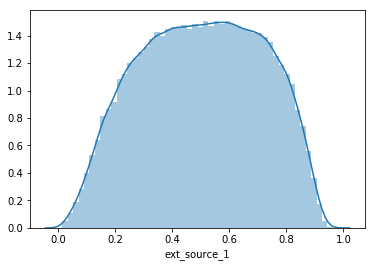

In [64]:
#ext_source_1
print(description['description'][41])
print(train.ext_source_1.isnull().sum())
sns.distplot(train.ext_source_1.dropna(), kde=True)

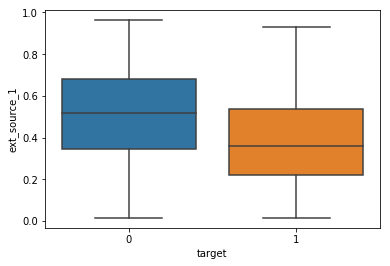

In [65]:
sns.boxplot(x='target', y='ext_source_1', data=train)

Normalized score from external data source
660


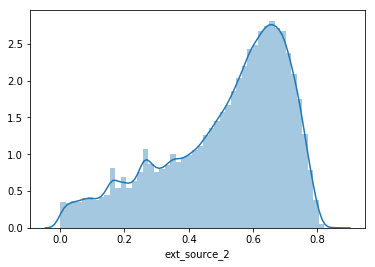

In [66]:
#ext_source_2
print(description['description'][42])
print(train.ext_source_2.isnull().sum())
sns.distplot(train.ext_source_2.dropna(), kde=True)

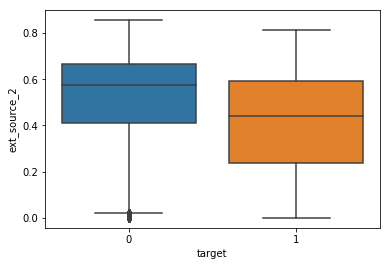

In [67]:
sns.boxplot(x='target', y='ext_source_2', data=train)

Normalized score from external data source
60965


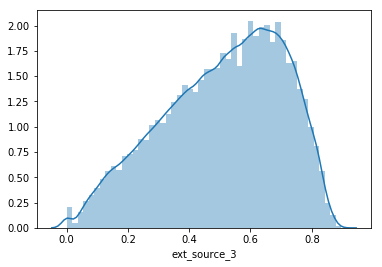

In [68]:
#ext_source_3
print(description['description'][43])
print(train.ext_source_3.isnull().sum())
sns.distplot(train.ext_source_3.dropna(), kde=True)


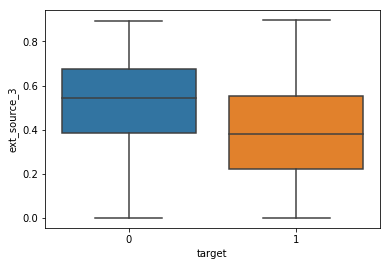

In [69]:
sns.boxplot(x='target', y='ext_source_3', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
156061


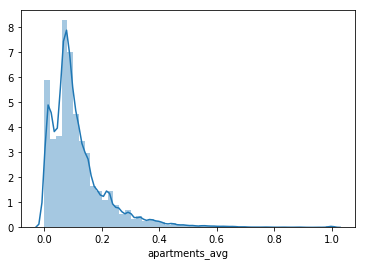

In [70]:
#apartments_avg - media do tamanho do apartamento, area comum, idade do predio, etc
print(description['description'][44])
print(train.apartments_avg.isnull().sum())
sns.distplot(train.apartments_avg.dropna(), kde=True)


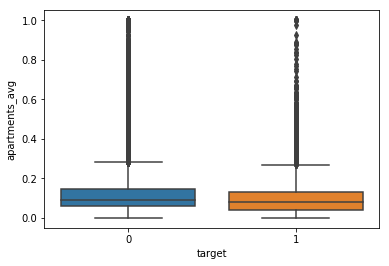

In [71]:
sns.boxplot(x='target', y='apartments_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
179943


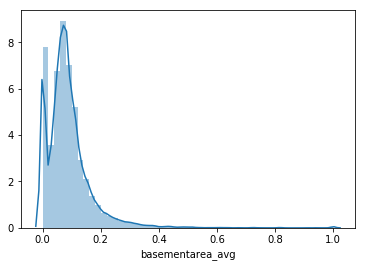

In [72]:
#basementarea_avg
print(description['description'][45])
print(train.basementarea_avg.isnull().sum())
sns.distplot(train.basementarea_avg.dropna(), kde=True)

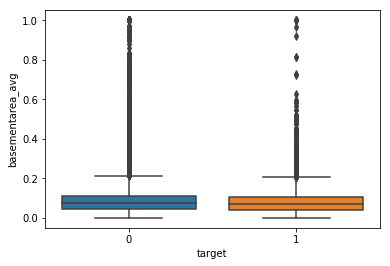

In [73]:
sns.boxplot(x='target', y='basementarea_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
150007


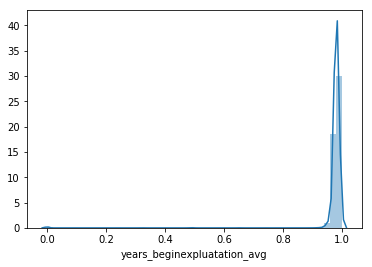

In [74]:
#years_beginexpluatation_avg
print(description['description'][46])
print(train.years_beginexpluatation_avg.isnull().sum())
sns.distplot(train.years_beginexpluatation_avg.dropna(), kde=True)

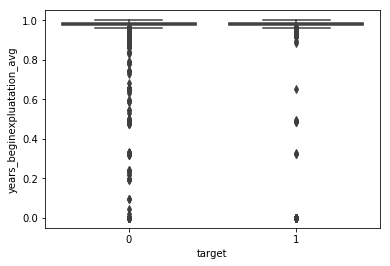

In [75]:
sns.boxplot(x='target', y='years_beginexpluatation_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
204488


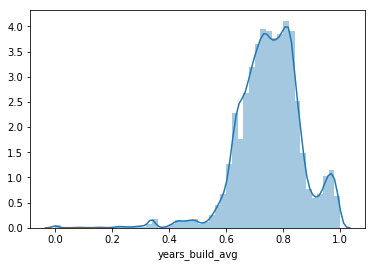

In [76]:
#years_build_avg
print(description['description'][47])
print(train.years_build_avg.isnull().sum())
sns.distplot(train.years_build_avg.dropna(), kde=True)

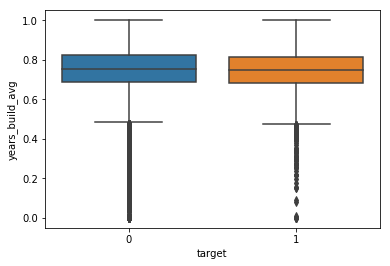

In [77]:
sns.boxplot(x='target', y='years_build_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
214865


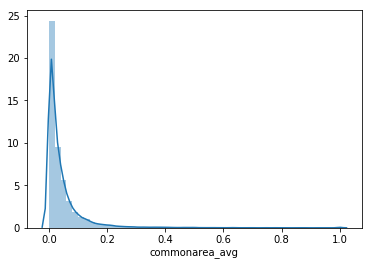

In [78]:
#commonarea_avg
print(description['description'][48])
print(train.commonarea_avg.isnull().sum())
sns.distplot(train.commonarea_avg.dropna(), kde=True)

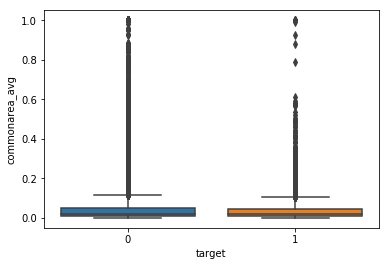

In [79]:
sns.boxplot(x='target', y='commonarea_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
163891


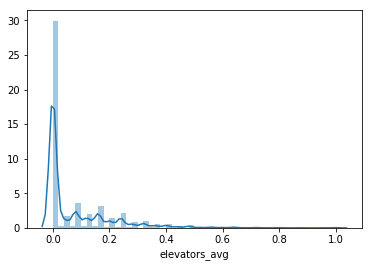

In [80]:
#elevators_avg
print(description['description'][49])
print(train.elevators_avg.isnull().sum())
sns.distplot(train.elevators_avg.dropna(), kde=True)

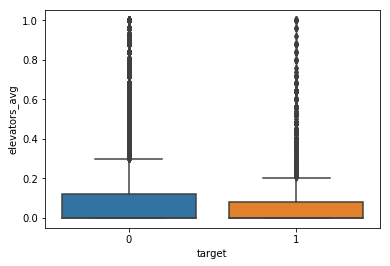

In [81]:
sns.boxplot(x='target', y='elevators_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
154828


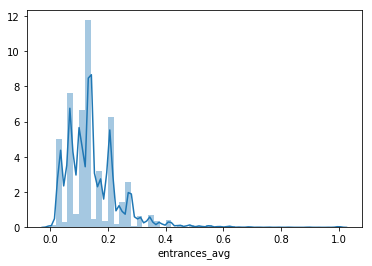

In [82]:
#entrances_avg
print(description['description'][50])
print(train.entrances_avg.isnull().sum())
sns.distplot(train.entrances_avg.dropna(), kde=True)

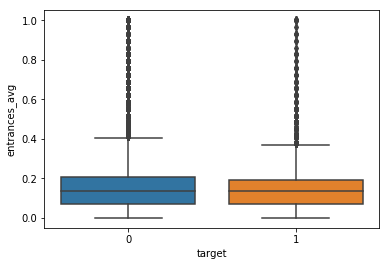

In [83]:
sns.boxplot(x='target', y='entrances_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor


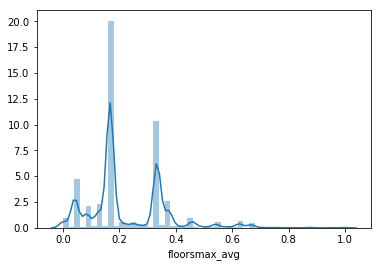

In [84]:
#floorsmax_avg
print(description['description'][51])
train.floorsmax_avg.isnull().sum()
sns.distplot(train.floorsmax_avg.dropna(), kde=True)

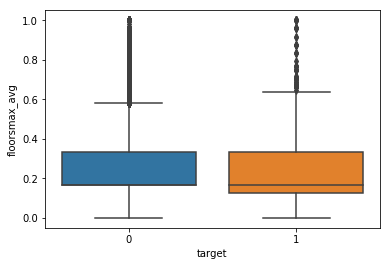

In [85]:
sns.boxplot(x='target', y='floorsmax_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
153020


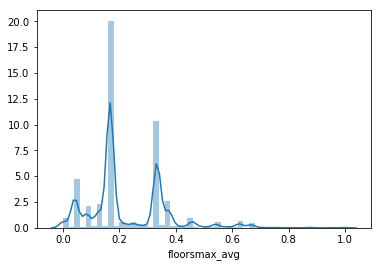

In [86]:
#floorsmax_avg
print(description['description'][51])
print(train.floorsmax_avg.isnull().sum())
sns.distplot(train.floorsmax_avg.dropna(), kde=True)

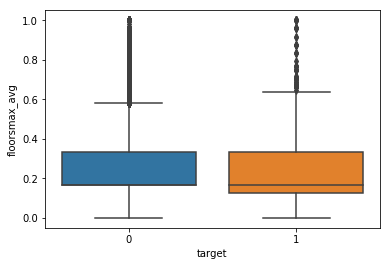

In [87]:
sns.boxplot(x='target', y='floorsmax_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
208642


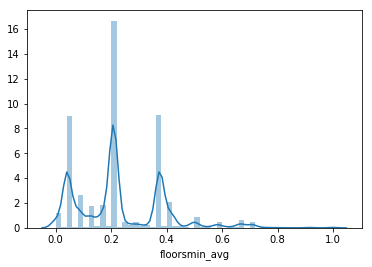

In [88]:
#floorsmin_avg
print(description['description'][52])
print(train.floorsmin_avg.isnull().sum())
sns.distplot(train.floorsmin_avg.dropna(), kde=True)

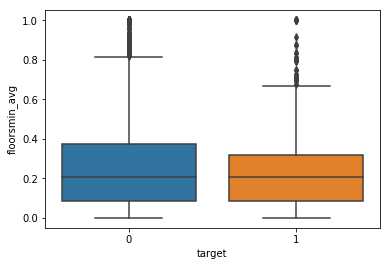

In [89]:
sns.boxplot(x='target', y='floorsmin_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
182590


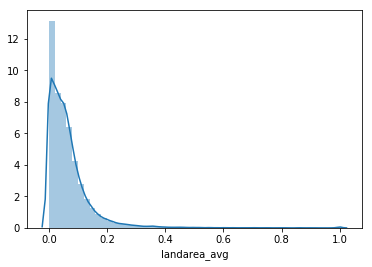

In [90]:
#landarea_avg
print(description['description'][53])
print(train.landarea_avg.isnull().sum())
sns.distplot(train.landarea_avg.dropna(), kde=True)

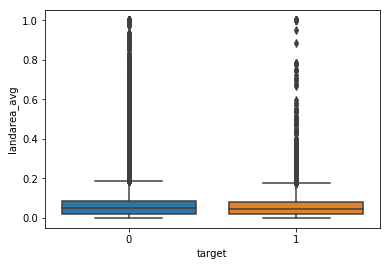

In [91]:
sns.boxplot(x='target', y='landarea_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
210199


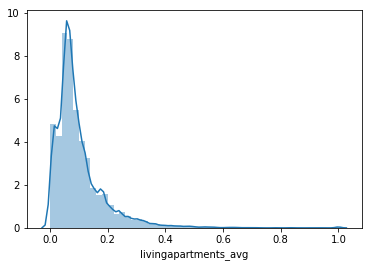

In [92]:
#livingapartments_avg
print(description['description'][54])
print(train.livingapartments_avg.isnull().sum())
sns.distplot(train.livingapartments_avg.dropna(), kde=True)

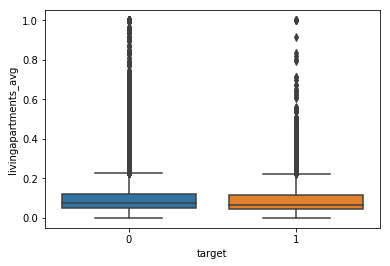

In [93]:
sns.boxplot(x='target', y='livingapartments_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
154350


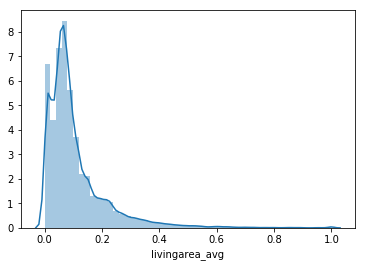

In [94]:
#livingarea_avg
print(description['description'][55])
print(train.livingarea_avg.isnull().sum())
sns.distplot(train.livingarea_avg.dropna(), kde=True)

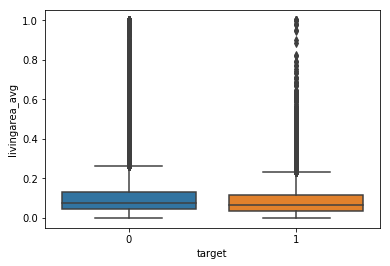

In [95]:
sns.boxplot(x='target', y='livingarea_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
213514


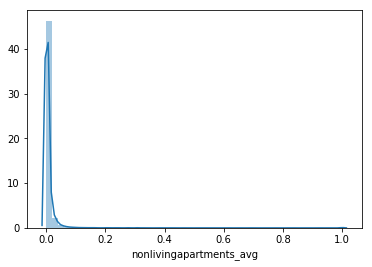

In [96]:
#nonlivingapartments_avg
print(description['description'][56])
print(train.nonlivingapartments_avg.isnull().sum())
sns.distplot(train.nonlivingapartments_avg.dropna(), kde=True)

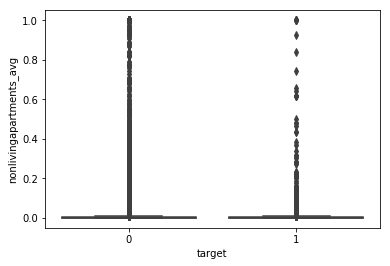

In [97]:
sns.boxplot(x='target', y='nonlivingapartments_avg', data=train)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
169682


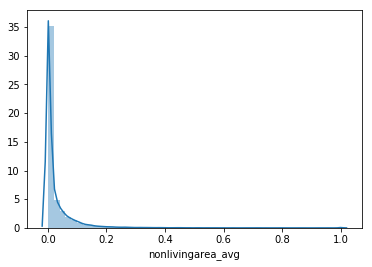

In [98]:
#nonlivingarea_avg
print(description['description'][57])
print(train.nonlivingarea_avg.isnull().sum())
sns.distplot(train.nonlivingarea_avg.dropna(), kde=True)

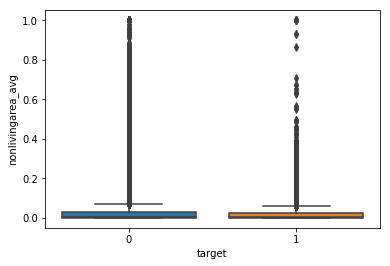

In [99]:
sns.boxplot(x='target', y='nonlivingarea_avg', data=train)

In [100]:
#mode - 58 a 72
#median - 59 a 85

In [101]:
#fondkapremont_mode
print(description['description'][86])
print(train.fondkapremont_mode.isnull().sum())
train.target.groupby(train.fondkapremont_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
210295


,count,mean,std,min,25%,50%,75%,max
fondkapremont_mode,,,,,,,,
not specified,5687.0,0.075435,0.264116,0.0,0.0,0.0,0.0,1.0
org spec account,5619.0,0.058195,0.234133,0.0,0.0,0.0,0.0,1.0
reg oper account,73830.0,0.069782,0.254781,0.0,0.0,0.0,0.0,1.0
reg oper spec account,12080.0,0.065563,0.247527,0.0,0.0,0.0,0.0,1.0


In [102]:
#housetype_mode
print(description['description'][88])
print(train.housetype_mode.isnull().sum())
train.target.groupby(train.housetype_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
154297


,count,mean,std,min,25%,50%,75%,max
housetype_mode,,,,,,,,
block of flats,150503.0,0.069434,0.254191,0.0,0.0,0.0,0.0,1.0
specific housing,1499.0,0.101401,0.301960,0.0,0.0,0.0,0.0,1.0
terraced house,1212.0,0.084983,0.278972,0.0,0.0,0.0,0.0,1.0


In [103]:
#wallsmaterial_mode
print(description['description'][89])
print(train.wallsmaterial_mode.isnull().sum())
train.target.groupby(train.wallsmaterial_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
156341


,count,mean,std,min,25%,50%,75%,max
wallsmaterial_mode,,,,,,,,
Block,9253.0,0.070247,0.255577,0.0,0.0,0.0,0.0,1.0
Mixed,2296.0,0.075348,0.264010,0.0,0.0,0.0,0.0,1.0
Monolithic,1779.0,0.047218,0.212163,0.0,0.0,0.0,0.0,1.0
Others,1625.0,0.083077,0.276083,0.0,0.0,0.0,0.0,1.0
Panel,66040.0,0.063477,0.243820,0.0,0.0,0.0,0.0,1.0
"Stone, brick",64815.0,0.074057,0.261866,0.0,0.0,0.0,0.0,1.0
Wooden,5362.0,0.096979,0.295956,0.0,0.0,0.0,0.0,1.0


In [104]:
#emergencystate_mode
print(description['description'][90])
print(train.emergencystate_mode.isnull().sum())
train.target.groupby(train.emergencystate_mode).describe()

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
145755


,count,mean,std,min,25%,50%,75%,max
emergencystate_mode,,,,,,,,
No,159428.0,0.069649,0.254555,0.0,0.0,0.0,0.0,1.0
Yes,2328.0,0.095790,0.294367,0.0,0.0,0.0,0.0,1.0


In [105]:
#obs_30_cnt_social_circle - observacoes com 30 dias devido a inadimplencia
print(description['description'][91])
print(train.obs_30_cnt_social_circle.isnull().sum())
train.target.groupby(train.obs_30_cnt_social_circle).describe()

How many observation of client's social surroundings with observable 30 DPD (days past due) default
1021


,count,mean,std,min,25%,50%,75%,max
obs_30_cnt_social_circle,,,,,,,,
0.0,163910.0,0.079007,0.269750,0.0,0.00,0.0,0.00,1.0
1.0,48783.0,0.079843,0.271053,0.0,0.00,0.0,0.00,1.0
2.0,29808.0,0.082461,0.275071,0.0,0.00,0.0,0.00,1.0
3.0,20322.0,0.082423,0.275015,0.0,0.00,0.0,0.00,1.0
4.0,14143.0,0.088242,0.283656,0.0,0.00,0.0,0.00,1.0
5.0,9553.0,0.083429,0.276544,0.0,0.00,0.0,0.00,1.0
6.0,6453.0,0.087556,0.282670,0.0,0.00,0.0,0.00,1.0
7.0,4390.0,0.093622,0.291335,0.0,0.00,0.0,0.00,1.0
8.0,2967.0,0.082912,0.275796,0.0,0.00,0.0,0.00,1.0


In [106]:
#def_30_cnt_social_circle -
print(description['description'][92])
print(train.def_30_cnt_social_circle.isnull().sum())
train.target.groupby(train.def_30_cnt_social_circle).describe()

How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
1021


,count,mean,std,min,25%,50%,75%,max
def_30_cnt_social_circle,,,,,,,,
0.0,271324.0,0.077759,0.267793,0.0,0.0,0.0,0.0,1.0
1.0,28328.0,0.101454,0.301935,0.0,0.0,0.0,0.0,1.0
2.0,5323.0,0.116476,0.320825,0.0,0.0,0.0,0.0,1.0
3.0,1192.0,0.128356,0.334626,0.0,0.0,0.0,0.0,1.0
4.0,253.0,0.138340,0.345941,0.0,0.0,0.0,0.0,1.0
5.0,56.0,0.142857,0.353094,0.0,0.0,0.0,0.0,1.0
6.0,11.0,0.090909,0.301511,0.0,0.0,0.0,0.0,1.0
7.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
8.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [107]:
#obs_60_cnt_social_circle
print(description['description'][93])
print(train.obs_60_cnt_social_circle.isnull().sum())
train.target.groupby(train.obs_60_cnt_social_circle).describe()

How many observation of client's social surroundings with observable 60 DPD (days past due) default
1021


,count,mean,std,min,25%,50%,75%,max
obs_60_cnt_social_circle,,,,,,,,
0.0,164666.0,0.079075,0.269857,0.0,0.00,0.0,0.00,1.0
1.0,48870.0,0.079681,0.270801,0.0,0.00,0.0,0.00,1.0
2.0,29766.0,0.082241,0.274737,0.0,0.00,0.0,0.00,1.0
3.0,20215.0,0.082612,0.275302,0.0,0.00,0.0,0.00,1.0
4.0,13946.0,0.088341,0.283800,0.0,0.00,0.0,0.00,1.0
5.0,9463.0,0.084328,0.277894,0.0,0.00,0.0,0.00,1.0
6.0,6349.0,0.088990,0.284752,0.0,0.00,0.0,0.00,1.0
7.0,4344.0,0.090009,0.286228,0.0,0.00,0.0,0.00,1.0
8.0,2886.0,0.083160,0.276172,0.0,0.00,0.0,0.00,1.0


In [108]:
#def_60_cnt_social_circle
print(description['description'][94])
print(train.def_60_cnt_social_circle.isnull().sum())
train.target.groupby(train.def_60_cnt_social_circle).describe()

How many observation of client's social surroundings defaulted on 60 (days past due) DPD
1021


,count,mean,std,min,25%,50%,75%,max
def_60_cnt_social_circle,,,,,,,,
0.0,280721.0,0.078348,0.268719,0.0,0.0,0.0,0.0,1.0
1.0,21841.0,0.105169,0.306778,0.0,0.0,0.0,0.0,1.0
2.0,3170.0,0.121451,0.326702,0.0,0.0,0.0,0.0,1.0
3.0,598.0,0.158863,0.365854,0.0,0.0,0.0,0.0,1.0
4.0,135.0,0.111111,0.315440,0.0,0.0,0.0,0.0,1.0
5.0,20.0,0.150000,0.366348,0.0,0.0,0.0,0.0,1.0
6.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
24.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


How many days before application did client change phone
1


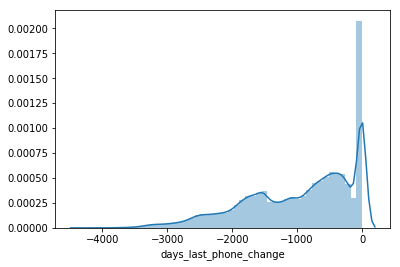

In [109]:
#days_last_phone_change
print(description['description'][95])
print(train.days_last_phone_change.isnull().sum())
sns.distplot(train.days_last_phone_change.dropna(), kde=True)

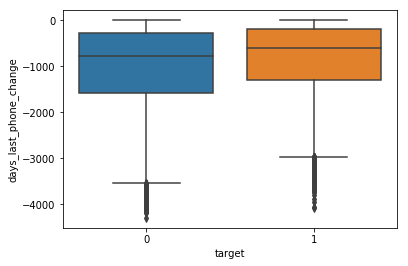

In [110]:
sns.boxplot(x='target', y='days_last_phone_change', data=train)

In [111]:
#flag_document_2
print(description['description'][96])
print(train.flag_document_2.isnull().sum())
train.target.groupby(train.flag_document_2).describe()

Did client provide document 2
0


,count,mean,std,min,25%,50%,75%,max
flag_document_2,,,,,,,,
0,307498.0,0.080719,0.272404,0.0,0.0,0.0,0.0,1.0
1,13.0,0.307692,0.480384,0.0,0.0,0.0,1.0,1.0


In [112]:
#flag_document_3
print(description['description'][97])
print(train.flag_document_3.isnull().sum())
train.target.groupby(train.flag_document_3).describe()

Did client provide document 3
0


,count,mean,std,min,25%,50%,75%,max
flag_document_3,,,,,,,,
0,89171.0,0.061825,0.240839,0.0,0.0,0.0,0.0,1.0
1,218340.0,0.088449,0.283948,0.0,0.0,0.0,0.0,1.0


In [113]:
#flag_document_4
print(description['description'][98])
print(train.flag_document_4.isnull().sum())
train.target.groupby(train.flag_document_4).describe()

Did client provide document 4
0


,count,mean,std,min,25%,50%,75%,max
flag_document_4,,,,,,,,
0,307486.0,0.080735,0.272429,0.0,0.0,0.0,0.0,1.0
1,25.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [114]:
#flag_document_5
print(description['description'][99])
print(train.flag_document_5.isnull().sum())
train.target.groupby(train.flag_document_5).describe()

Did client provide document 5
0


,count,mean,std,min,25%,50%,75%,max
flag_document_5,,,,,,,,
0,302863.0,0.080739,0.272435,0.0,0.0,0.0,0.0,1.0
1,4648.0,0.080034,0.271376,0.0,0.0,0.0,0.0,1.0


In [115]:
#flag_document_6
print(description['description'][100])
print(train.flag_document_6.isnull().sum())
train.target.groupby(train.flag_document_6).describe()

Did client provide document 6
0


,count,mean,std,min,25%,50%,75%,max
flag_document_6,,,,,,,,
0,280433.0,0.083150,0.276109,0.0,0.0,0.0,0.0,1.0
1,27078.0,0.055654,0.229257,0.0,0.0,0.0,0.0,1.0


In [116]:
#flag_document_7
print(description['description'][101])
print(train.flag_document_7.isnull().sum())
train.target.groupby(train.flag_document_7).describe()

Did client provide document 7
0


,count,mean,std,min,25%,50%,75%,max
flag_document_7,,,,,,,,
0,307452.0,0.080735,0.272427,0.0,0.0,0.0,0.0,1.0
1,59.0,0.050847,0.221572,0.0,0.0,0.0,0.0,1.0


In [117]:
#flag_document_8
print(description['description'][102])
print(train.flag_document_8.isnull().sum())
train.target.groupby(train.flag_document_8).describe()

Did client provide document 8
0


,count,mean,std,min,25%,50%,75%,max
flag_document_8,,,,,,,,
0,282487.0,0.081381,0.273419,0.0,0.0,0.0,0.0,1.0
1,25024.0,0.073370,0.260747,0.0,0.0,0.0,0.0,1.0


In [118]:
#flag_document_9
print(description['description'][103])
print(train.flag_document_9.isnull().sum())
train.target.groupby(train.flag_document_9).describe()

Did client provide document 9
0


,count,mean,std,min,25%,50%,75%,max
flag_document_9,,,,,,,,
0,306313.0,0.080803,0.272533,0.0,0.0,0.0,0.0,1.0
1,1198.0,0.061770,0.240837,0.0,0.0,0.0,0.0,1.0


In [119]:
#flag_document_10
print(description['description'][104])
print(train.flag_document_10.isnull().sum())
train.target.groupby(train.flag_document_10).describe()

Did client provide document 10
0


,count,mean,std,min,25%,50%,75%,max
flag_document_10,,,,,,,,
0,307504.0,0.080731,0.272421,0.0,0.0,0.0,0.0,1.0
1,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [120]:
#flag_document_11
print(description['description'][105])
print(train.flag_document_11.isnull().sum())
train.target.groupby(train.flag_document_11).describe()

Did client provide document 11
0


,count,mean,std,min,25%,50%,75%,max
flag_document_11,,,,,,,,
0,306308.0,0.080801,0.27253,0.0,0.0,0.0,0.0,1.0
1,1203.0,0.062344,0.24188,0.0,0.0,0.0,0.0,1.0


In [121]:
#flag_document_12
print(description['description'][106])
print(train.flag_document_12.isnull().sum())
train.target.groupby(train.flag_document_12).describe()

Did client provide document 12
0


,count,mean,std,min,25%,50%,75%,max
flag_document_12,,,,,,,,
0,307509.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
1,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [122]:
#flag_document_13
print(description['description'][107])
print(train.flag_document_13.isnull().sum())
train.target.groupby(train.flag_document_13).describe()

Did client provide document 13
0


,count,mean,std,min,25%,50%,75%,max
flag_document_13,,,,,,,,
0,306427.0,0.080916,0.272707,0.0,0.0,0.0,0.0,1.0
1,1084.0,0.027675,0.164116,0.0,0.0,0.0,0.0,1.0


In [123]:
#flag_document_14
print(description['description'][108])
print(train.flag_document_14.isnull().sum())
train.target.groupby(train.flag_document_14).describe()

Did client provide document 14
0


,count,mean,std,min,25%,50%,75%,max
flag_document_14,,,,,,,,
0,306608.0,0.080869,0.272634,0.0,0.0,0.0,0.0,1.0
1,903.0,0.033223,0.179317,0.0,0.0,0.0,0.0,1.0


In [124]:
#flag_document_15
print(description['description'][109])
print(train.flag_document_15.isnull().sum())
train.target.groupby(train.flag_document_15).describe()

Did client provide document 15
0


,count,mean,std,min,25%,50%,75%,max
flag_document_15,,,,,,,,
0,307139.0,0.080791,0.272514,0.0,0.0,0.0,0.0,1.0
1,372.0,0.029570,0.169626,0.0,0.0,0.0,0.0,1.0


In [125]:
#flag_document_16
print(description['description'][110])
print(train.flag_document_16.isnull().sum())
train.target.groupby(train.flag_document_16).describe()

Did client provide document 16
0


,count,mean,std,min,25%,50%,75%,max
flag_document_16,,,,,,,,
0,304458.0,0.081046,0.272906,0.0,0.0,0.0,0.0,1.0
1,3053.0,0.049132,0.216179,0.0,0.0,0.0,0.0,1.0


In [126]:
#flag_document_17
print(description['description'][111])
print(train.flag_document_17.isnull().sum())
train.target.groupby(train.flag_document_17).describe()

Did client provide document 17
0


,count,mean,std,min,25%,50%,75%,max
flag_document_17,,,,,,,,
0,307429.0,0.080744,0.272442,0.0,0.0,0.0,0.0,1.0
1,82.0,0.024390,0.155207,0.0,0.0,0.0,0.0,1.0


In [127]:
#flag_document_18
print(description['description'][112])
print(train.flag_document_18.isnull().sum())
train.target.groupby(train.flag_document_18).describe()

Did client provide document 18
0


,count,mean,std,min,25%,50%,75%,max
flag_document_18,,,,,,,,
0,305011.0,0.080925,0.272720,0.0,0.0,0.0,0.0,1.0
1,2500.0,0.056800,0.231506,0.0,0.0,0.0,0.0,1.0


In [128]:
#flag_document_19
print(description['description'][113])
print(train.flag_document_19.isnull().sum())
train.target.groupby(train.flag_document_19).describe()

Did client provide document 19
0


,count,mean,std,min,25%,50%,75%,max
flag_document_19,,,,,,,,
0,307328.0,0.080738,0.272433,0.0,0.0,0.0,0.0,1.0
1,183.0,0.065574,0.248215,0.0,0.0,0.0,0.0,1.0


In [129]:
#flag_document_20
print(description['description'][114])
print(train.flag_document_20.isnull().sum())
train.target.groupby(train.flag_document_20).describe()

Did client provide document 20
0


,count,mean,std,min,25%,50%,75%,max
flag_document_20,,,,,,,,
0,307355.0,0.080727,0.272417,0.0,0.0,0.0,0.0,1.0
1,156.0,0.083333,0.277276,0.0,0.0,0.0,0.0,1.0


In [130]:
#flag_document_21
print(description['description'][115])
print(train.flag_document_21.isnull().sum())
train.target.groupby(train.flag_document_21).describe()

Did client provide document 21
0


,count,mean,std,min,25%,50%,75%,max
flag_document_21,,,,,,,,
0,307408.0,0.080710,0.272390,0.0,0.0,0.0,0.0,1.0
1,103.0,0.135922,0.344382,0.0,0.0,0.0,0.0,1.0


In [131]:
#amt_req_credit_bureau_hour -
print(description['description'][116])
print(train.amt_req_credit_bureau_hour.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_hour).describe()

Number of enquiries to Credit Bureau about the client one hour before application
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_hour,,,,,,,,
0.0,264366.0,0.077173,0.266867,0.0,0.0,0.0,0.0,1.0
1.0,1560.0,0.080128,0.271579,0.0,0.0,0.0,0.0,1.0
2.0,56.0,0.107143,0.312094,0.0,0.0,0.0,0.0,1.0
3.0,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [132]:
#amt_req_credit_bureau_day
print(description['description'][117])
print(train.amt_req_credit_bureau_day.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_day).describe()

Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_day,,,,,,,,
0.0,264503.0,0.077096,0.266743,0.0,0.0,0.0,0.0,1.0
1.0,1292.0,0.096749,0.295730,0.0,0.0,0.0,0.0,1.0
2.0,106.0,0.103774,0.306415,0.0,0.0,0.0,0.0,1.0
3.0,45.0,0.044444,0.208409,0.0,0.0,0.0,0.0,1.0
4.0,26.0,0.115385,0.325813,0.0,0.0,0.0,0.0,1.0
5.0,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6.0,8.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8.0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
9.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [133]:
#amt_req_credit_bureau_week
print(description['description'][118])
print(train.amt_req_credit_bureau_week.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_week).describe()

Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_week,,,,,,,,
0.0,257456.0,0.077159,0.266844,0.0,0.0,0.0,0.0,1.0
1.0,8208.0,0.077729,0.267761,0.0,0.0,0.0,0.0,1.0
2.0,199.0,0.100503,0.301427,0.0,0.0,0.0,0.0,1.0
3.0,58.0,0.068966,0.255609,0.0,0.0,0.0,0.0,1.0
4.0,34.0,0.117647,0.327035,0.0,0.0,0.0,0.0,1.0
5.0,10.0,0.100000,0.316228,0.0,0.0,0.0,0.0,1.0
6.0,20.0,0.050000,0.223607,0.0,0.0,0.0,0.0,1.0
7.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8.0,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [134]:
#amt_req_credit_bureau_mon
print(description['description'][119])
print(train.amt_req_credit_bureau_mon.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_mon).describe()

Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_mon,,,,,,,,
0.0,222233.0,0.077914,0.268036,0.0,0.0,0.0,0.0,1.0
1.0,33147.0,0.077232,0.266963,0.0,0.0,0.0,0.0,1.0
2.0,5386.0,0.070368,0.255789,0.0,0.0,0.0,0.0,1.0
3.0,1991.0,0.054244,0.226556,0.0,0.0,0.0,0.0,1.0
4.0,1076.0,0.055762,0.229568,0.0,0.0,0.0,0.0,1.0
5.0,602.0,0.066445,0.249266,0.0,0.0,0.0,0.0,1.0
6.0,343.0,0.052478,0.223315,0.0,0.0,0.0,0.0,1.0
7.0,298.0,0.057047,0.232322,0.0,0.0,0.0,0.0,1.0
8.0,185.0,0.032432,0.177626,0.0,0.0,0.0,0.0,1.0


In [135]:
#amt_req_credit_bureau_qrt
print(description['description'][120])
print(train.amt_req_credit_bureau_qrt.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_qrt).describe()

Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_qrt,,,,,,,,
0.0,215417.0,0.078476,0.268919,0.0,0.0,0.0,0.00,1.0
1.0,33862.0,0.065767,0.247878,0.0,0.0,0.0,0.00,1.0
2.0,14412.0,0.083472,0.276604,0.0,0.0,0.0,0.00,1.0
3.0,1717.0,0.073384,0.260841,0.0,0.0,0.0,0.00,1.0
4.0,476.0,0.119748,0.325008,0.0,0.0,0.0,0.00,1.0
5.0,64.0,0.093750,0.293785,0.0,0.0,0.0,0.00,1.0
6.0,28.0,0.250000,0.440959,0.0,0.0,0.0,0.25,1.0
7.0,7.0,0.142857,0.377964,0.0,0.0,0.0,0.00,1.0
8.0,7.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [136]:
#amt_req_credit_bureau_year
print(description['description'][121])
print(train.amt_req_credit_bureau_year.isnull().sum())
train.target.groupby(train.amt_req_credit_bureau_year).describe()

Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
41519


,count,mean,std,min,25%,50%,75%,max
amt_req_credit_bureau_year,,,,,,,,
0.0,71801.0,0.071350,0.257410,0.0,0.0,0.0,0.00,1.0
1.0,63405.0,0.073338,0.260693,0.0,0.0,0.0,0.00,1.0
2.0,50192.0,0.081049,0.272913,0.0,0.0,0.0,0.00,1.0
3.0,33628.0,0.079577,0.270641,0.0,0.0,0.0,0.00,1.0
4.0,20714.0,0.082553,0.275212,0.0,0.0,0.0,0.00,1.0
5.0,12052.0,0.083223,0.276230,0.0,0.0,0.0,0.00,1.0
6.0,6967.0,0.090713,0.287222,0.0,0.0,0.0,0.00,1.0
7.0,3869.0,0.092013,0.289082,0.0,0.0,0.0,0.00,1.0
8.0,2127.0,0.086037,0.280484,0.0,0.0,0.0,0.00,1.0
